## BUISENESS CASE : BASE ON GIVEN FEATURE AND MESUREMENT PREDICT WHETHER PATIENT WILL HAVE HEART DISEASE OR NOT
### BINARY CLASSIFICATION TASK


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('C:/Users/pnm99/OneDrive/Desktop/values.csv')
df1 = pd.read_csv('C:/Users/pnm99/OneDrive/Desktop/labels.csv')
data = pd.concat([df,df1],axis=1)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,glucose,patient_id,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,101,0z64un,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,121,ryoo3j,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,105,yt1s1x,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,104,l2xjde,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,106,oyt4ek,0


## BASIC CHECKS

In [15]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,glucose,patient_id,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,101,0z64un,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,121,ryoo3j,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,105,yt1s1x,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,104,l2xjde,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,106,oyt4ek,0


In [19]:
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,glucose,patient_id,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,120,5qfar3,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,136,2s2b1f,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,125,nsd00i,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,124,0xw93k,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,125,2nx10r,0


In [21]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'glucose',
       'patient_id', 'heart_disease_present'],
      dtype='object')

* Patient ID feature return twice

In [22]:
data.shape

(180, 16)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [24]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,glucose,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.322222,126.166667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.468631,16.171739,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,95.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,112.750000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,125.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,139.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,171.000000,1.000000


In [26]:
# Changing column name: 
data.rename({'slope_of_peak_exercise_st_segment':'sop','resting_blood_pressure':'resting_bp','chest_pain_type':'cpt',
            'num_major_vessels':'major_vessels','fasting_blood_sugar_gt_120_mg_per_dl':'fasting_blood_sugar',
            'resting_ekg_results':'ekg_result','serum_cholesterol_mg_per_dl':'serum_cholesterol',
            'oldpeak_eq_st_depression':'oldpeak_st_depression','max_heart_rate_achieved':'max_heart_rate',
             'heart_disease_present':'heart_disease'},inplace=True,axis=1)

In [27]:
univariate = data[['sop','thal','resting_bp','cpt','major_vessels','fasting_blood_sugar','ekg_result',
                  'serum_cholesterol','oldpeak_st_depression','sex','age','max_heart_rate','exercise_induced_angina',
                   'heart_disease']]

In [28]:
data.head()

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,101,0z64un,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,121,ryoo3j,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,105,yt1s1x,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,104,l2xjde,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,106,oyt4ek,0


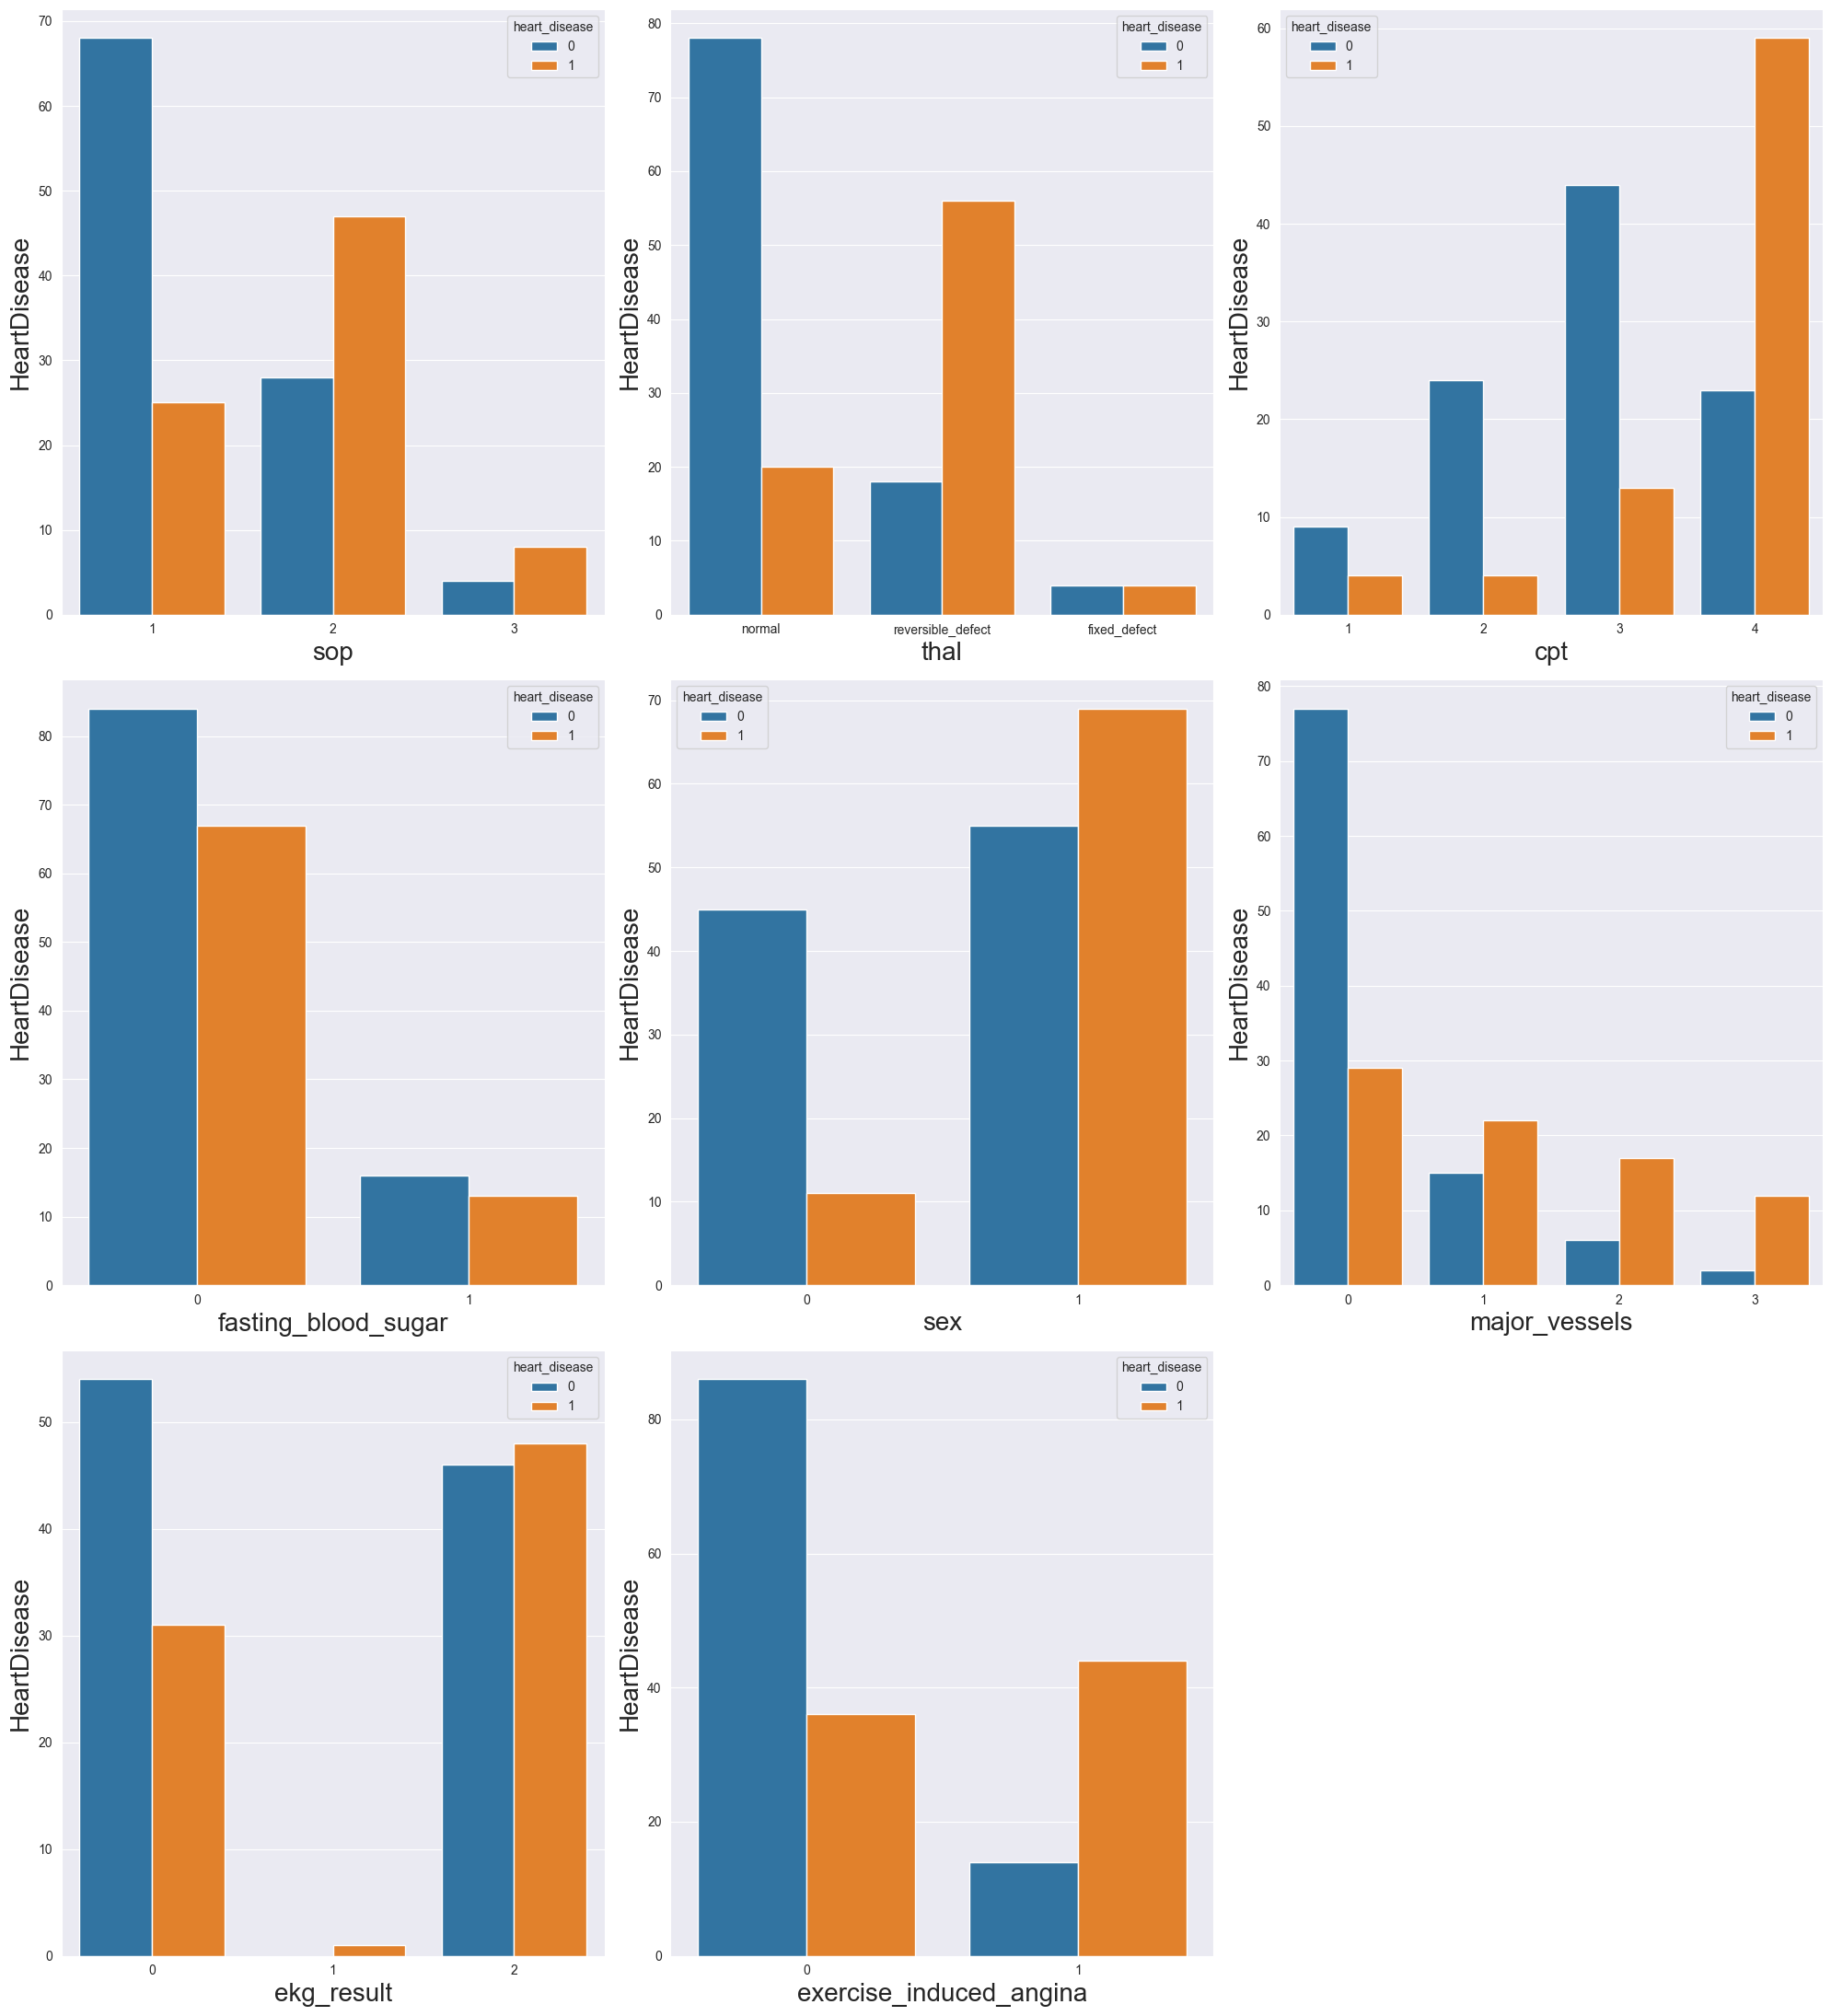

In [29]:
categorical = data[['sop','thal','cpt','fasting_blood_sugar','sex','major_vessels','ekg_result','exercise_induced_angina']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in categorical: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # set the limit
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.countplot(x=categorical[column],hue=data.heart_disease) # it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) # assigning name to x-axis and font size is 20
        plt.ylabel('HeartDisease',fontsize=20) # assigning name to y-axis and font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.tight_layout()
plt.show() # used to hide storage area location

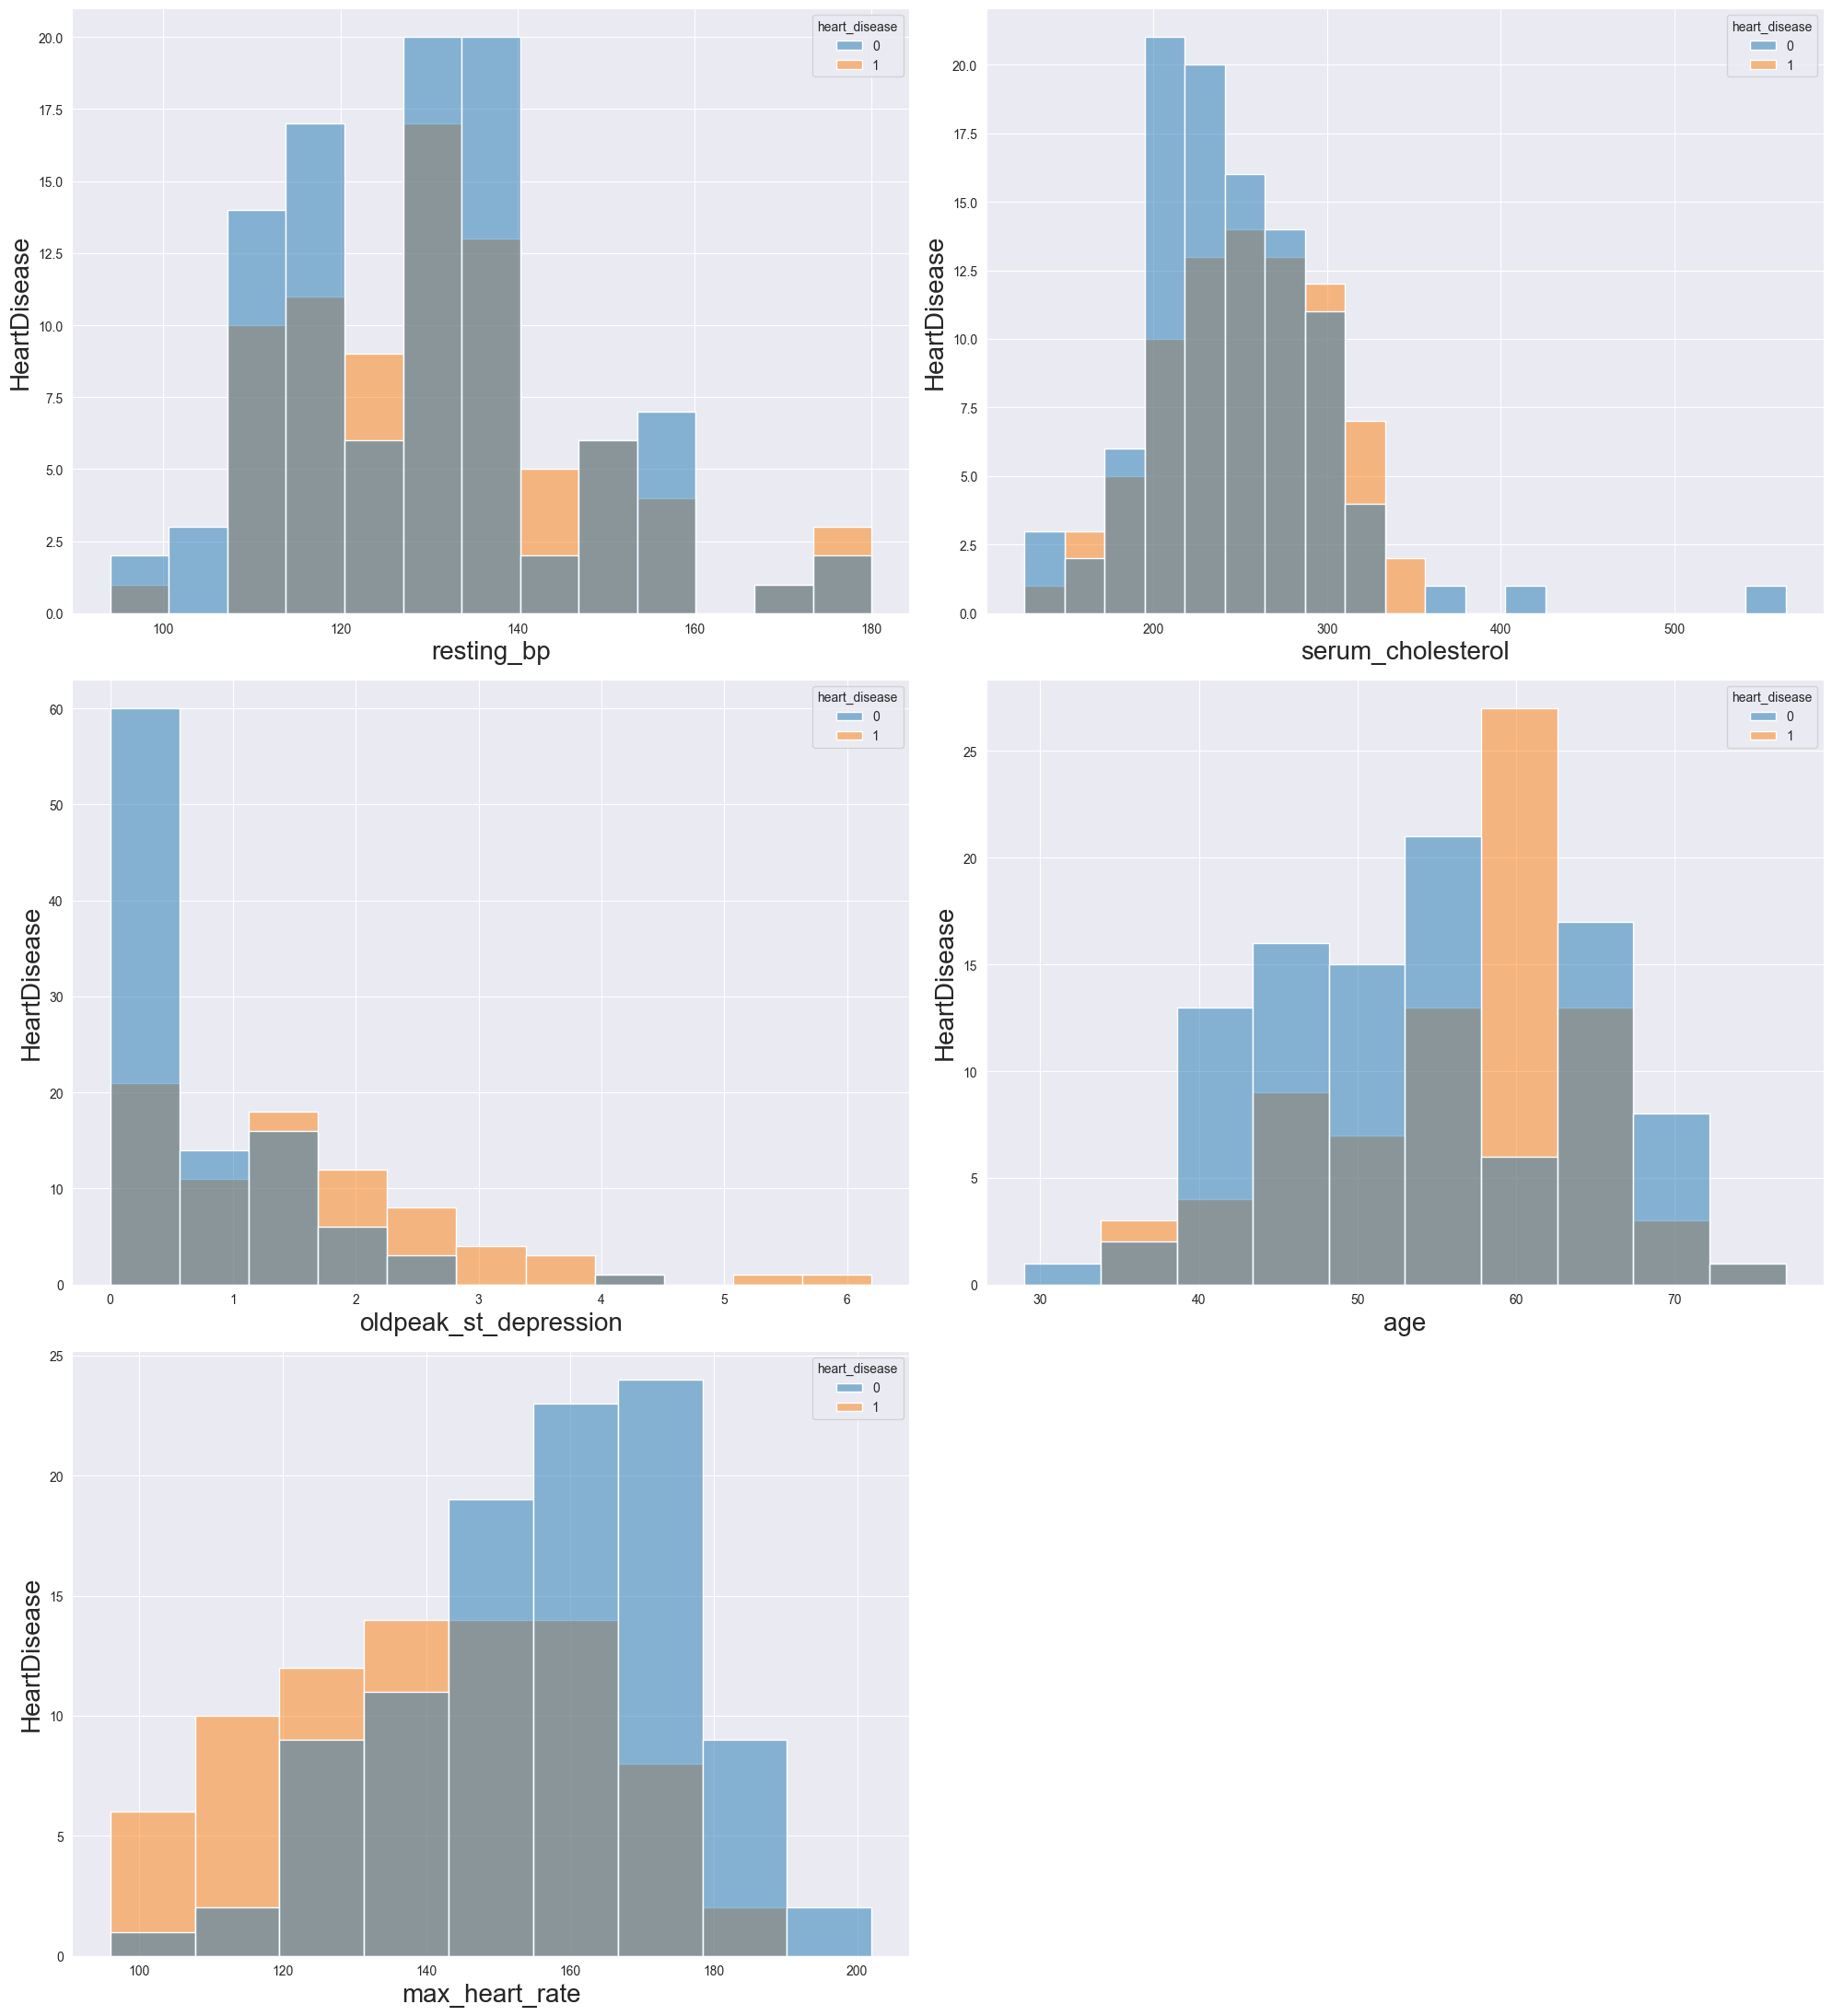

In [30]:
numerical = data[['resting_bp','serum_cholesterol','oldpeak_st_depression','age','max_heart_rate']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=numerical[column],hue=data.heart_disease) # it give frequency hue =value counts
        plt.ylabel('HeartDisease',fontsize=20)# assigning name to y-axis and font size is 20
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


In [109]:
csv_file = pd.read_csv('C:/Users/pnm99/OneDrive/Desktop/values.csv')
column1 =csv_file['sex']
print(column1)

0      1
1      0
2      1
3      1
4      1
      ..
175    1
176    0
177    1
178    1
179    0
Name: sex, Length: 180, dtype: int64


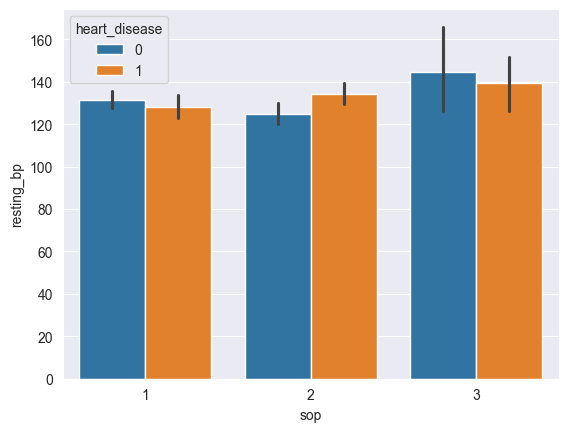

In [31]:
sns.barplot(x='sop',y='resting_bp',hue=data.heart_disease,data=data)
plt.show()

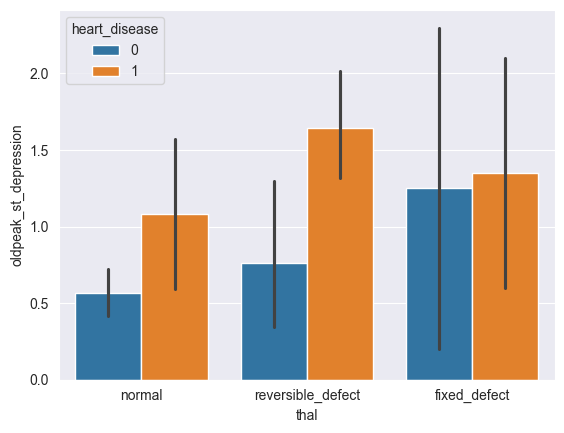

In [32]:
sns.barplot(x='thal',y='oldpeak_st_depression',hue=data.heart_disease,data=data)
plt.show()

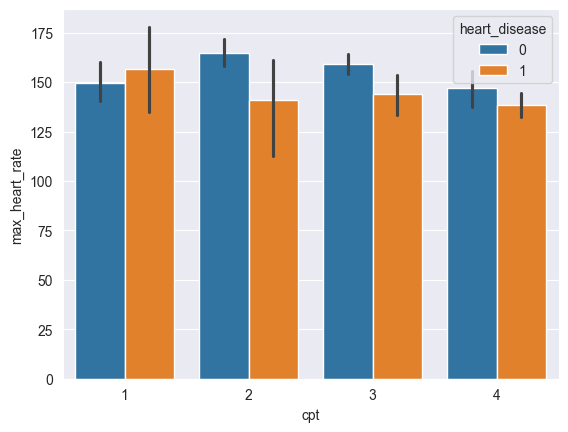

In [33]:
sns.barplot(x='cpt',y='max_heart_rate',hue=data.heart_disease,data=data)
plt.show()

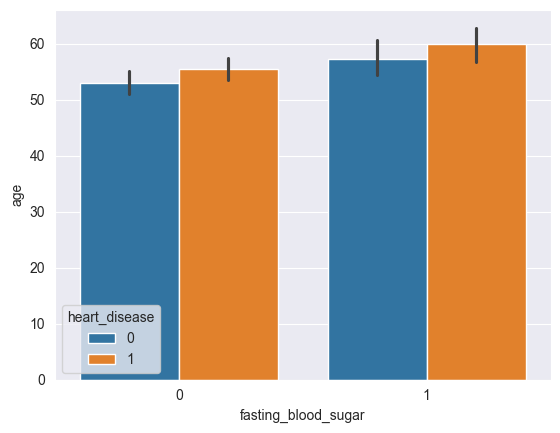

In [34]:
sns.barplot(x='fasting_blood_sugar',y='age',hue=data.heart_disease,data=data)
plt.show()

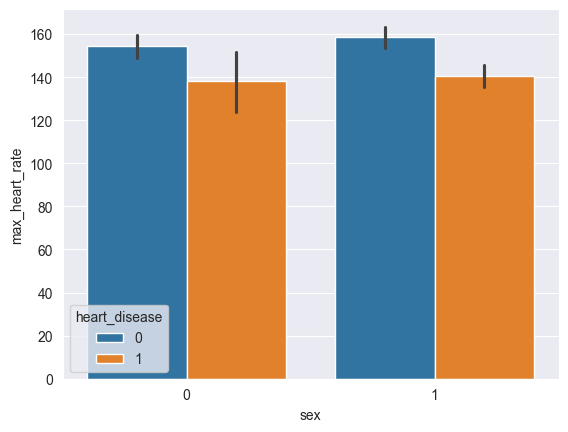

In [35]:
sns.barplot(x='sex',y='max_heart_rate',hue=data.heart_disease,data=data)
plt.show()

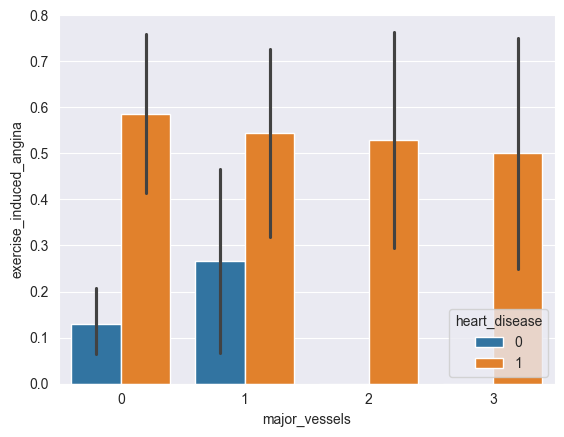

In [36]:
sns.barplot(x='major_vessels',y='exercise_induced_angina',hue=data.heart_disease,data=data)
plt.show()

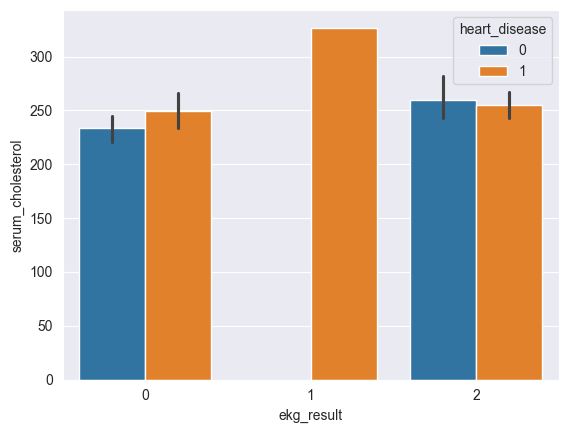

In [37]:
sns.barplot(x='ekg_result',y='serum_cholesterol',hue=data.heart_disease,data=data)
plt.show()

In [38]:
data.isnull().sum()

sop                        0
thal                       0
resting_bp                 0
cpt                        0
major_vessels              0
fasting_blood_sugar        0
ekg_result                 0
serum_cholesterol          0
oldpeak_st_depression      0
sex                        0
age                        0
max_heart_rate             0
exercise_induced_angina    0
glucose                    0
patient_id                 0
heart_disease              0
dtype: int64

In [39]:
# In this dataset only one categorical data-type feature 
# we use manual encoding to convert categorical data to numerical 
# Getting the value counts of thal
data.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [40]:
data.thal = data.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})
# normal is assign with value 2 because normal has more weightage
# reversible defect assign with value 1 because of less weightage than normal
# fixed defect assign with value 0 because of less weightage

In [41]:
# checking the unique value of thal
data.thal.unique()

array([2, 1, 0], dtype=int64)

#### 3.OUTLIER HANDLING
* Handling outlier if it is necessary

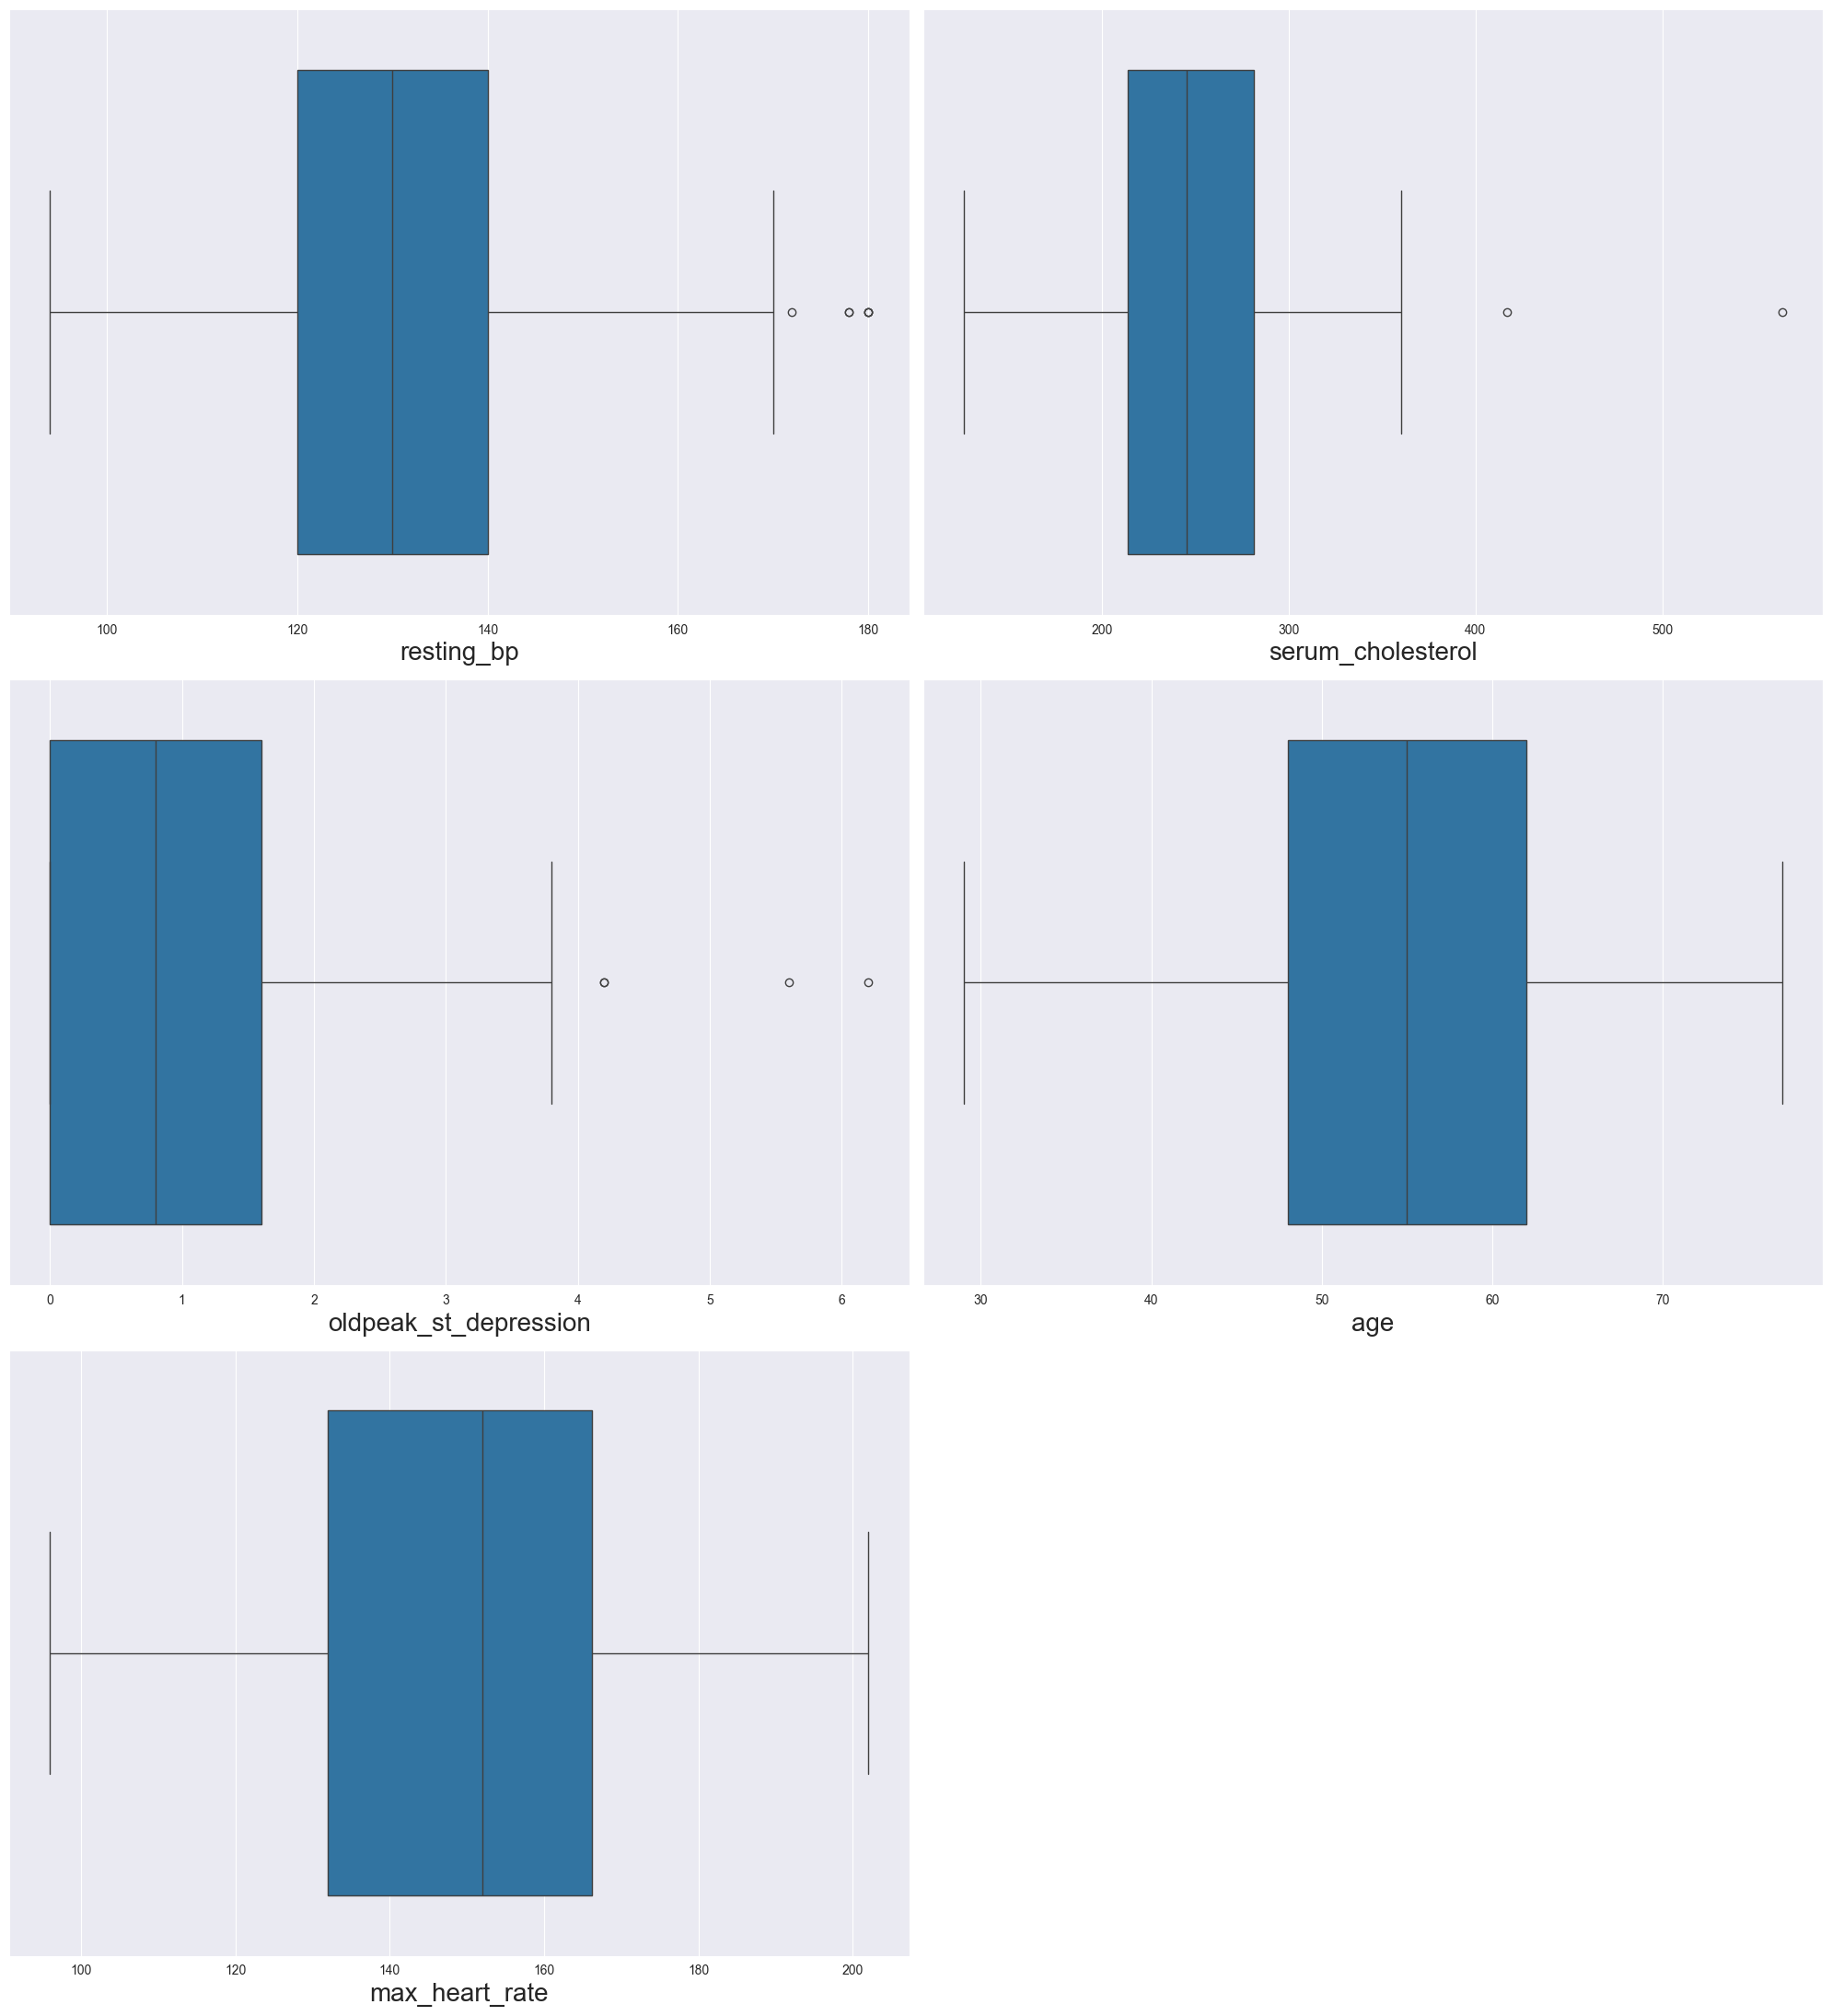

In [42]:
out = data[['resting_bp','serum_cholesterol','oldpeak_st_depression','age','max_heart_rate']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


#### CHECKING DISTRIBUTION BEFORE HANDLE OUTLIER

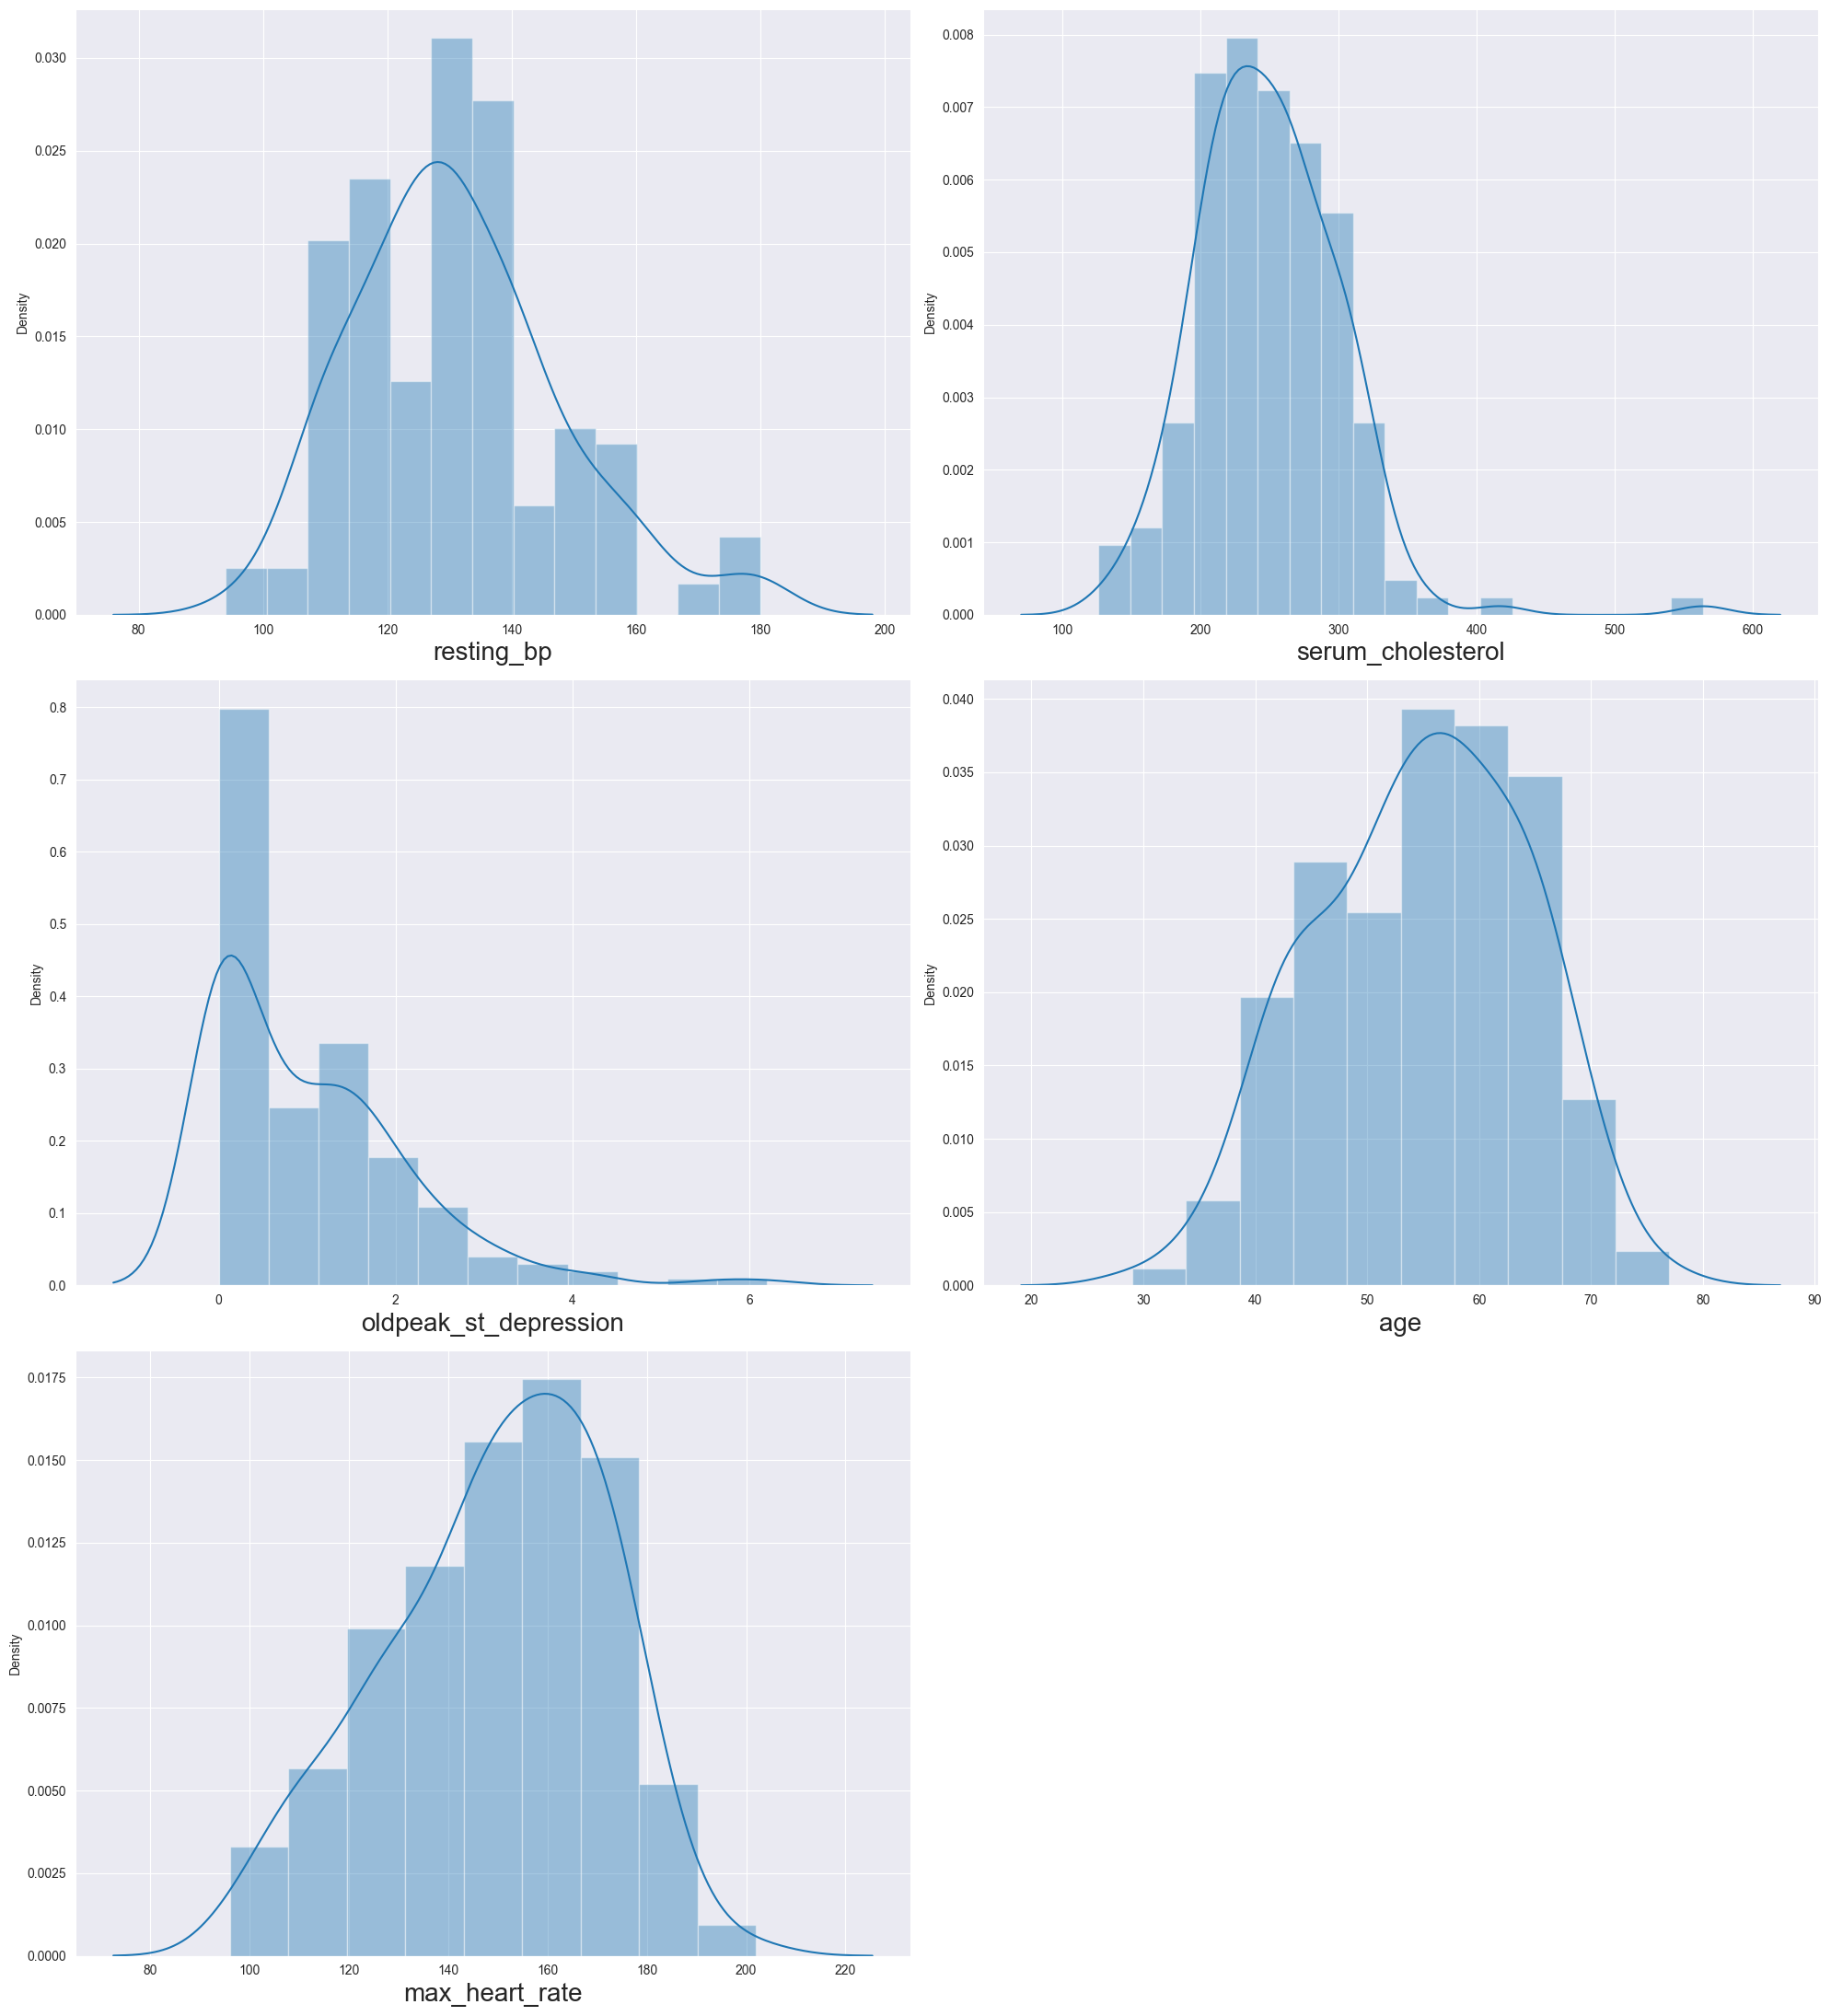

In [43]:
out = data[['resting_bp','serum_cholesterol','oldpeak_st_depression','age','max_heart_rate']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


##### 1.RESTING BP
######  IQR

In [44]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(data['resting_bp'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['resting_bp'].quantile(0.25)  # first quantile
Q3 = data['resting_bp'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 20.0
minimum limit 90.0
maximum limit 170.0


In [45]:
# Step:3 Filtering the data
data.loc[data['resting_bp'] < min_limit]

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease


In [46]:
data.loc[data['resting_bp'] > max_limit]

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,106,oyt4ek,0
33,1,2,180,4,0,0,0,325,0.0,0,64,154,1,103,0n5fu0,0
72,1,1,172,3,0,1,0,199,0.5,1,52,162,0,111,qwj1yf,0
75,2,1,178,4,2,1,0,228,1.0,0,66,165,1,152,4v0q7o,1
113,2,1,180,3,0,1,2,274,1.6,1,68,150,1,146,sqddbc,1
176,2,2,180,4,0,0,1,327,3.4,0,55,117,1,136,2s2b1f,1


In [47]:
# Step:4 Imputation of outlier
data.loc[data['resting_bp'] > max_limit ,'resting_bp']=np.median(data['resting_bp'])

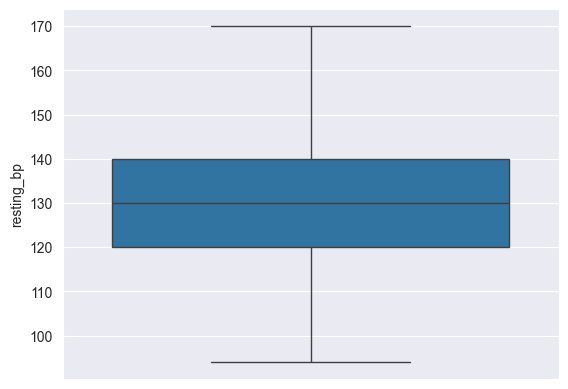

In [48]:
# Step:5 Visualise outlier after imputation
sns.boxplot(data.resting_bp)
plt.show()

* After imputation no outlier present in data

In [49]:
# iqr used because of right skewed in data

# Step:1 
iqr = stats.iqr(data['serum_cholesterol'], interpolation='midpoint')
print("IQR",iqr)

# Step:2 
Q1 = data['serum_cholesterol'].quantile(0.25)  # first quantile
Q2 = data['serum_cholesterol'].quantile(0.75)  # Third quantile

# Getting maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print('Minimum limit',min_limit)

max_limit = Q3 + 1.5*iqr
print('Maximum limit',max_limit)



IQR 68.0
Minimum limit 111.75
Maximum limit 242.0


In [50]:
# Step:3 filtering the data
data.loc[data['serum_cholesterol'] < min_limit]

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease


In [51]:
data.loc[data['serum_cholesterol'] > max_limit]
len(data.loc[data['serum_cholesterol'] > max_limit])/180*100

53.333333333333336

In [52]:
# iqr used becused of right skewed in data

# Step:1
iqr = stats.iqr(data['oldpeak_st_depression'] ,interpolation='midpoint')
print("IQR",iqr)

# Step:2
Q1 = data['oldpeak_st_depression'].quantile(0.25) # first quantile
Q3 = data['oldpeak_st_depression'].quantile(0.75) # Third quantile

# Getting maximum and minimum kimit
min_limit = Q1 - 1.5*iqr
print("Minimum limit",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum limit",max_limit)

IQR 1.6
Minimum limit -2.4000000000000004
Maximum limit 4.0


In [53]:
# Step:3 filtering the data
data.loc[data['oldpeak_st_depression'] < min_limit]

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease


In [54]:
data.loc[data['oldpeak_st_depression'] > max_limit]

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,patient_id,heart_disease
4,3,1,130,1,0,0,2,270,4.2,1,59,145,0,106,oyt4ek,0
112,2,1,140,4,3,0,0,298,4.2,1,51,122,1,142,6r9x2j,1
140,3,1,140,4,0,0,0,217,5.6,1,55,111,1,152,noxsnw,1
162,3,1,160,4,3,0,2,164,6.2,0,62,145,0,139,usnkhx,1


In [55]:
# Step:4 Impute outlier
data.loc[data['oldpeak_st_depression'] > max_limit,'oldpeak_st_depression'] = np.median(data['oldpeak_st_depression'])

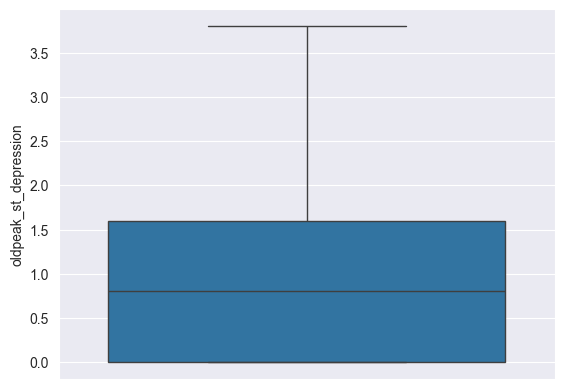

In [56]:
# Step:5 Visualise outlier after imputation
sns.boxplot(data.oldpeak_st_depression)
plt.show()

* After imputation no outlier present in data

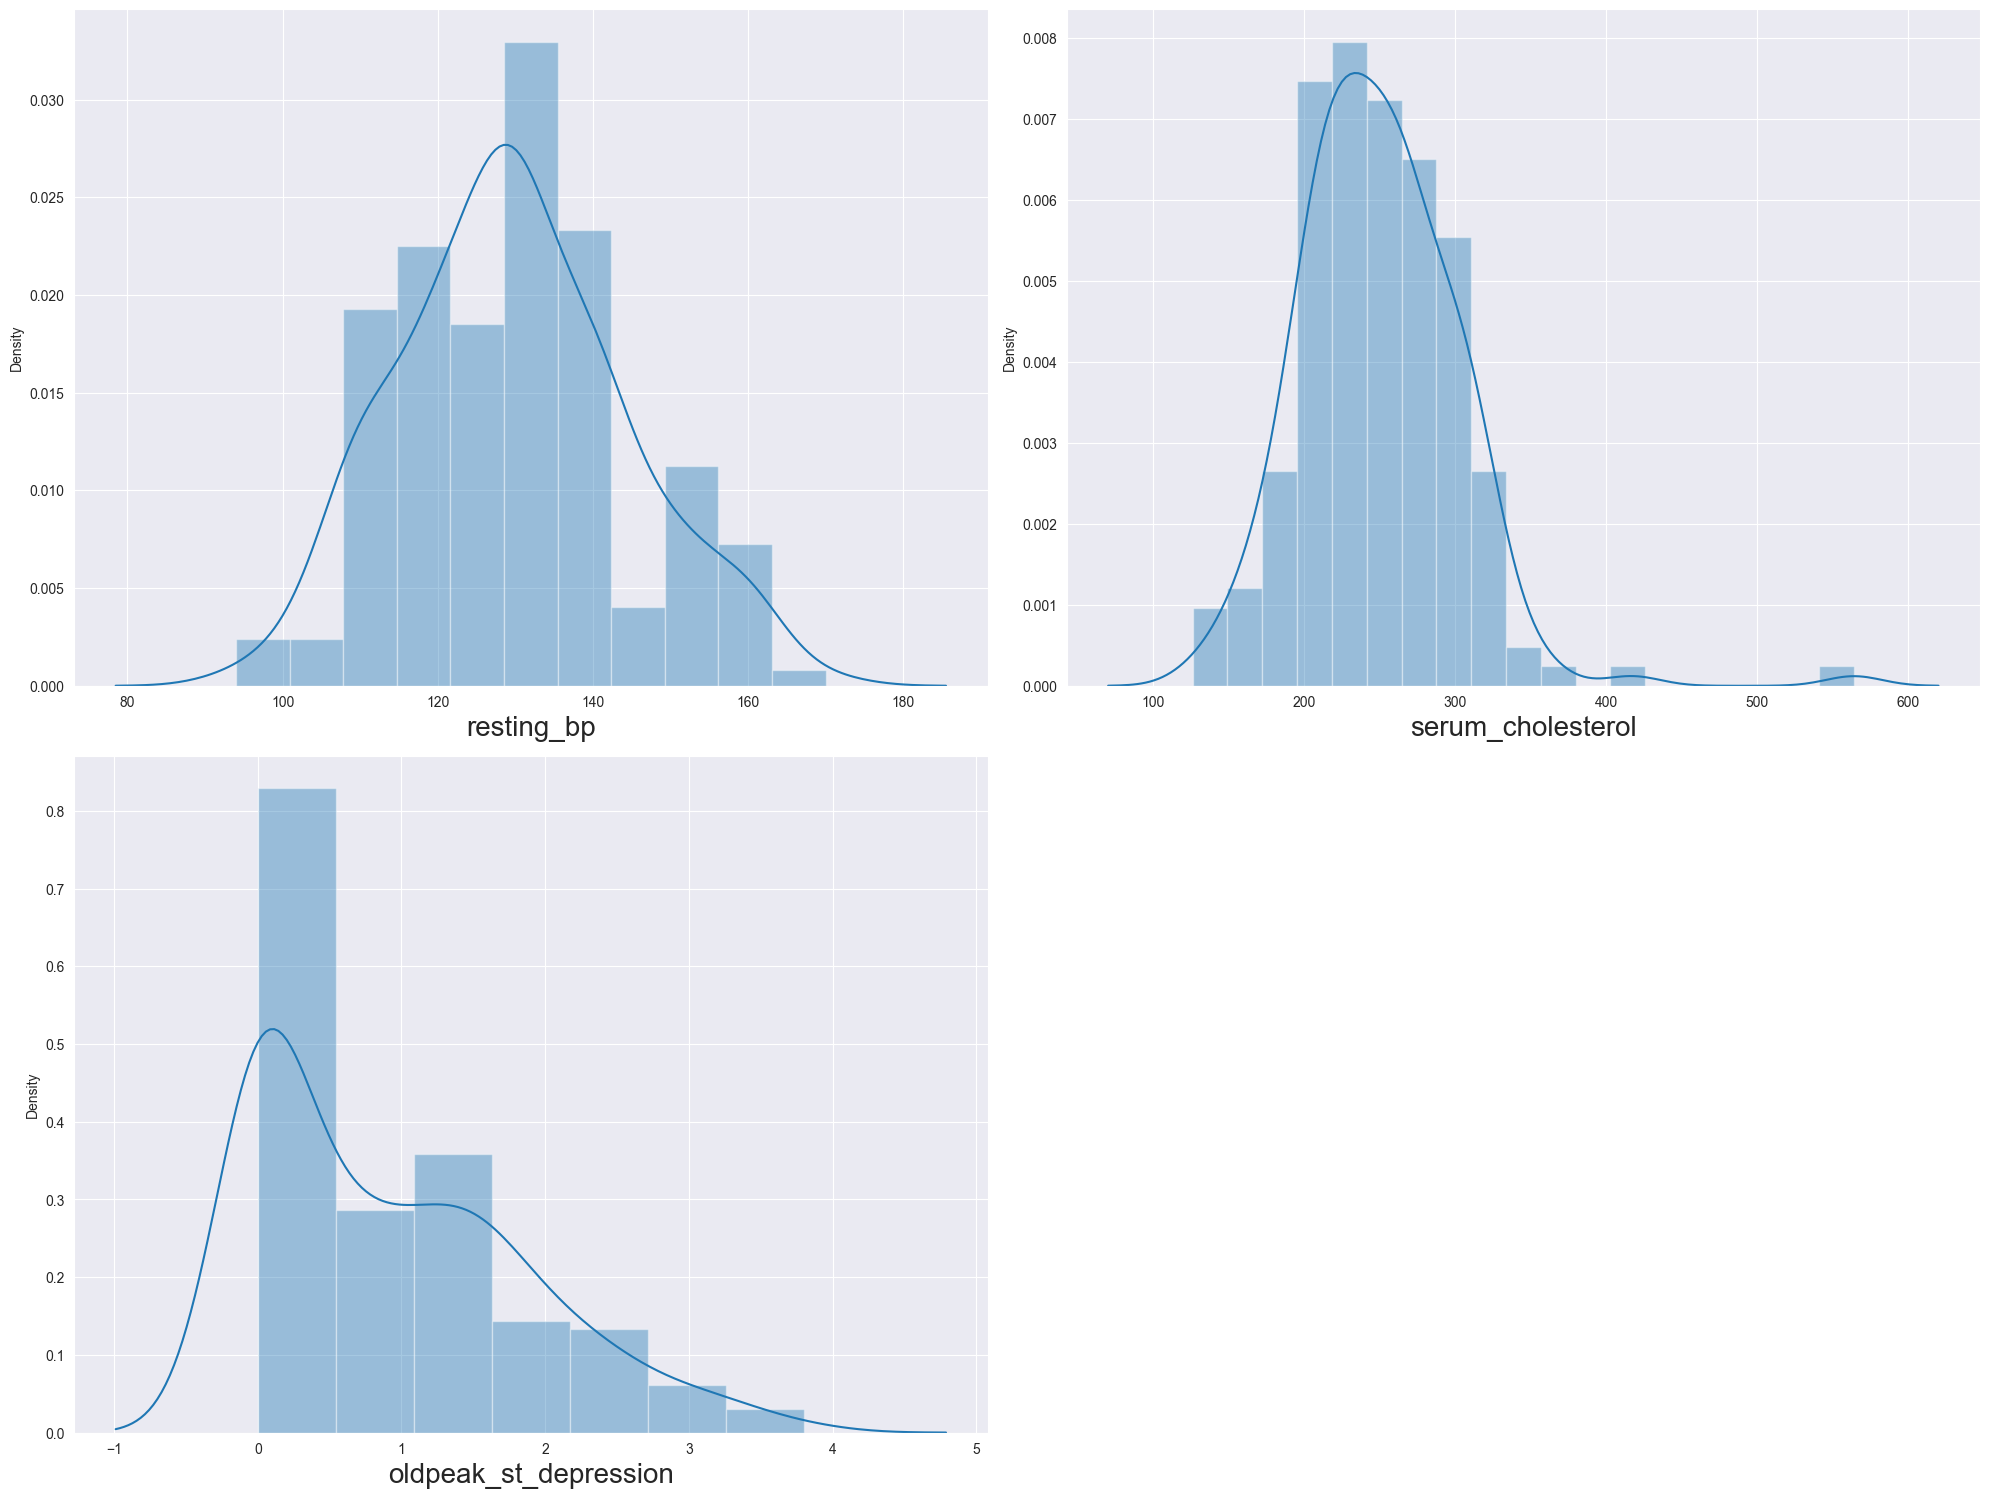

In [57]:
out = data[['resting_bp','serum_cholesterol','oldpeak_st_depression']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 3 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


In [58]:
# import library
from sklearn.preprocessing import StandardScaler

# Creating object
scale = StandardScaler()

# Scaling the feature 
data[['resting_bp','serum_cholesterol','oldpeak_st_depression','age','max_heart_rate']] = scale.fit_transform(data[['resting_bp','serum_cholesterol','oldpeak_st_depression','age','max_heart_rate']])


In [59]:
# Check constant column
data.describe()

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,heart_disease
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,1.800000e+02,1.800000e+02,180.000000,1.800000e+02,1.800000e+02,180.000000,180.000000,180.000000
mean,1.550000,1.500000,1.578984e-16,3.155556,0.694444,0.161111,1.050000,4.440892e-17,-1.973730e-17,0.688889,1.295260e-16,6.019876e-16,0.322222,126.166667,0.444444
std,0.618838,0.583765,1.002789e+00,0.938454,0.969347,0.368659,0.998742,1.002789e+00,1.002789e+00,0.464239,1.002789e+00,1.002789e+00,0.468631,16.171739,0.498290
min,1.000000,0.000000,-2.450820e+00,1.000000,0.000000,0.000000,0.000000,-2.343694e+00,-9.856897e-01,0.000000,-2.772773e+00,-2.430824e+00,0.000000,95.000000,0.000000
25%,1.000000,1.000000,-6.664645e-01,3.000000,0.000000,0.000000,0.000000,-6.745333e-01,-9.856897e-01,0.000000,-7.316875e-01,-7.946197e-01,0.000000,112.750000,0.000000
50%,1.000000,2.000000,1.982617e-02,3.000000,0.000000,0.000000,2.000000,-7.059193e-02,-1.244074e-01,1.000000,2.029150e-02,1.143828e-01,0.000000,125.000000,0.000000
75%,2.000000,2.000000,7.061168e-01,4.000000,1.000000,0.000000,2.000000,6.094366e-01,7.368748e-01,1.000000,7.722705e-01,7.620471e-01,1.000000,139.250000,1.000000
max,3.000000,2.000000,2.764989e+00,4.000000,3.000000,1.000000,2.000000,5.987844e+00,3.105401e+00,1.000000,2.383654e+00,2.386889e+00,1.000000,171.000000,1.000000


In [60]:
# dropping the unique column
data.drop('patient_id',axis=1,inplace=True)
data.head()

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,heart_disease
0,1,2,-0.117432,2,0,0,2,1.118269,-0.985690,1,-1.053964,0.932485,0,101,0
1,2,2,-1.352755,3,0,0,0,-0.669778,0.736875,0,-0.087134,0.387084,0,121,0
2,1,2,-0.323319,4,3,0,2,1.042182,-0.985690,1,2.383654,0.568884,1,105,1
3,1,1,1.529666,4,0,0,0,-0.498582,-0.985690,1,-1.591092,1.432436,0,104,1
4,3,1,0.019826,1,0,0,2,0.395442,-0.124407,1,0.449994,-0.203768,0,106,0


In [61]:
data.corr()

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose,heart_disease
sop,1.000000,-0.317019,0.061536,0.121207,0.076832,0.050199,0.172191,-0.032348,0.535583,0.093340,0.169918,-0.418102,0.252354,0.041588,0.344224
thal,-0.317019,1.000000,-0.122475,-0.254939,-0.153024,-0.064897,0.004791,0.050466,-0.279462,-0.412284,-0.067663,0.278681,-0.306315,-0.059769,-0.460933
resting_bp,0.061536,-0.122475,1.000000,-0.037038,0.090367,0.096842,0.113544,0.119426,0.110505,-0.016618,0.259479,-0.014901,0.056095,-0.047056,0.076048
cpt,0.121207,-0.254939,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.061213,0.070715,0.086057,0.085001,-0.301792,0.342696,-0.087856,0.412829
major_vessels,0.076832,-0.153024,0.090367,0.249061,1.000000,0.169792,0.096656,0.098348,0.167406,0.073107,0.347355,-0.275687,0.144161,0.088085,0.421519
fasting_blood_sugar,0.050199,-0.064897,0.096842,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.002458,0.066010,0.176101,0.058369,0.021198,-0.035452,0.003379
ekg_result,0.172191,0.004791,0.113544,0.033379,0.096656,0.053864,1.000000,0.170839,0.118666,0.045786,0.126856,-0.102766,0.048938,-0.090450,0.145933
serum_cholesterol,-0.032348,0.050466,0.119426,0.061213,0.098348,0.027560,0.170839,1.000000,0.016623,-0.152296,0.236211,-0.071038,0.070949,-0.045663,0.079775
oldpeak_st_depression,0.535583,-0.279462,0.110505,0.070715,0.167406,-0.002458,0.118666,0.016623,1.000000,0.121071,0.202029,-0.324242,0.266182,0.028867,0.388253
sex,0.093340,-0.412284,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.152296,0.121071,1.000000,-0.148997,-0.053960,0.257929,0.009178,0.335421


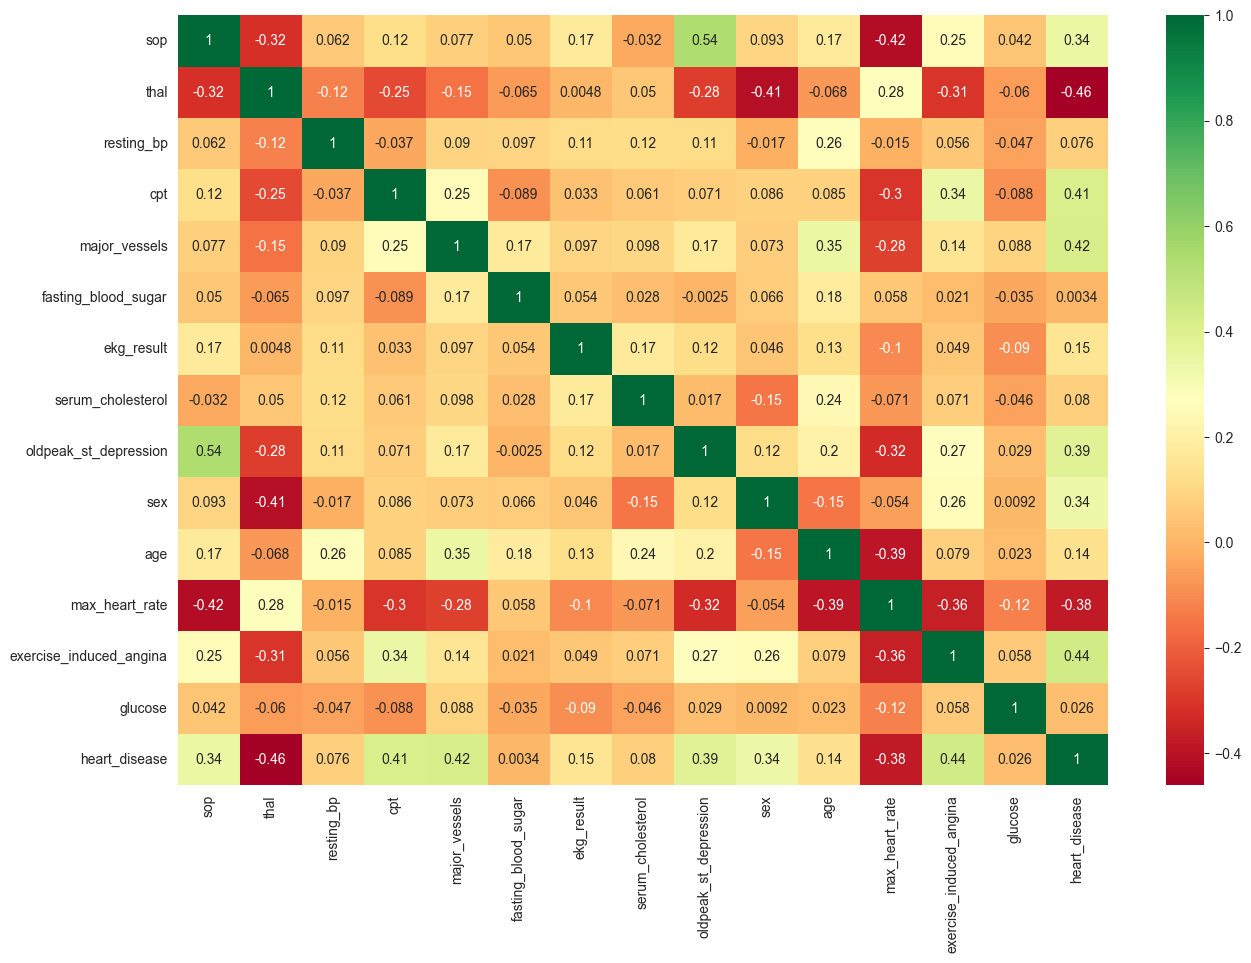

In [62]:
# Plot hitmap for better visualisation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})
plt.show()

In [63]:
X = data.iloc[:,:-1]
y = data.heart_disease

In [64]:
# Checking the X
X.head()

,sop,thal,resting_bp,cpt,major_vessels,fasting_blood_sugar,ekg_result,serum_cholesterol,oldpeak_st_depression,sex,age,max_heart_rate,exercise_induced_angina,glucose
0,1,2,-0.117432,2,0,0,2,1.118269,-0.985690,1,-1.053964,0.932485,0,101
1,2,2,-1.352755,3,0,0,0,-0.669778,0.736875,0,-0.087134,0.387084,0,121
2,1,2,-0.323319,4,3,0,2,1.042182,-0.985690,1,2.383654,0.568884,1,105
3,1,1,1.529666,4,0,0,0,-0.498582,-0.985690,1,-1.591092,1.432436,0,104
4,3,1,0.019826,1,0,0,2,0.395442,-0.124407,1,0.449994,-0.203768,0,106


In [65]:
# Check y
y.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease, dtype: int64

In [66]:
y.value_counts()

heart_disease
0    100
1     80
Name: count, dtype: int64

In [67]:
# importing library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=45)

In [68]:
# check the shape of X train, y train, X test and y test
X_train.shape

(144, 14)

In [69]:
X_test.shape

(36, 14)

In [70]:
y_train.shape

(144,)

In [71]:
y_test.shape

(36,)

In [72]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

In [73]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 82.63888888888889
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        79
           1       0.79      0.83      0.81        65

    accuracy                           0.83       144
   macro avg       0.82      0.83      0.83       144
weighted avg       0.83      0.83      0.83       144



In [74]:
# In heaert disease prediction recall is more important
recall_log = recall_score(y_log_predict,y_test)
recall_log*100

80.0

In [75]:
# crosstab of logistic regression
pd.crosstab(y_log_predict,y_test)

heart_disease,0,1
row_0,,
0,22,4
1,2,8


In [76]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.3333333333333333, 0.2222222222222222, 0.2777777777777778, 0.19444444444444445, 0.2777777777777778, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.19444444444444445, 0.25]


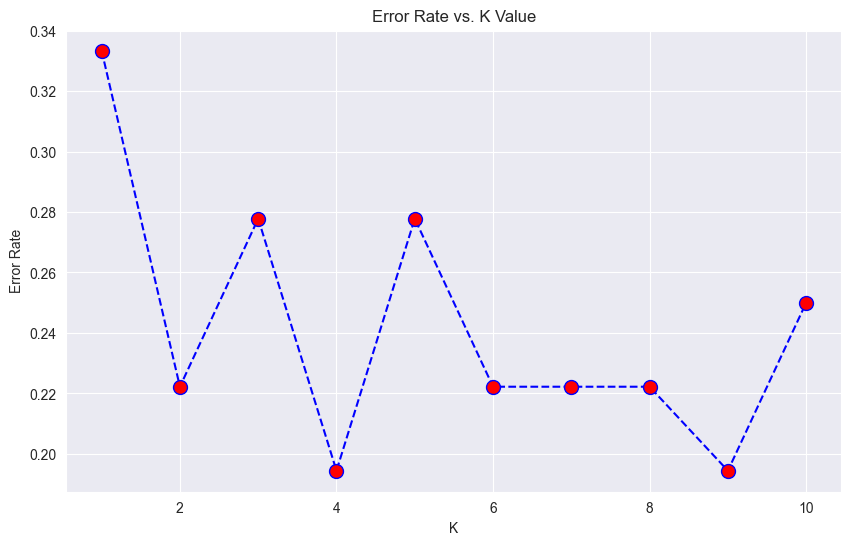

In [77]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [78]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)


In [79]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy of knn model ",knn_train_accuracy)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  0.8680555555555556
Training classification report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        79
           1       0.84      0.88      0.86        65

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144



In [80]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(knn_test_predict,y_test))

Testing accuracy of knn model 72.22222222222221
Testing classification report: 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.75      0.56      0.64        16

    accuracy                           0.72        36
   macro avg       0.73      0.71      0.71        36
weighted avg       0.73      0.72      0.72        36



In [81]:
# Recall score
recall_knn = recall_score(knn_test_predict,y_test)
recall_knn*100

56.25

In [82]:
# Cross tab
pd.crosstab(knn_test_predict,y_test)

heart_disease,0,1
row_0,,
0,17,3
1,7,9


In [83]:
# Step:1 importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# Step:2 fitting training data
rf.fit(X_train,y_train)

# Step:3 Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)


In [84]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        68

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [85]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 77.77777777777779
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.58      0.70      0.64        10

    accuracy                           0.78        36
   macro avg       0.73      0.75      0.74        36
weighted avg       0.79      0.78      0.78        36



In [86]:
# Cross tab
pd.crosstab(rf_test_predict,y_test)

heart_disease,0,1
row_0,,
0,21,5
1,3,7


In [87]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Step:4 Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=20,cv=2,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rf_cv.fit(X_train,y_train)

# Step:6 Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 73}


In [88]:
# Step:7 Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf1.fit(X_train,y_train)

# Step:9 Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)


In [89]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 77.77777777777779
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.58      0.70      0.64        10

    accuracy                           0.78        36
   macro avg       0.73      0.75      0.74        36
weighted avg       0.79      0.78      0.78        36



In [90]:
rf_recall_score = recall_score(rf_clf1_predict,y_test)
print("Recall score:",rf_recall_score*100)

Recall score: 70.0
